<a href="https://colab.research.google.com/github/andrenp2/FinancialStudyPython/blob/master/Invest04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulando uma CARTEIRA DE ACOES e comparando com o IBOVESPA

***4.1 - Importando Bibliotecas***

In [3]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader.data as web
import seaborn as sns


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


***4.2 - Obtendo e tratando dados ***

In [5]:
tickers = ["PETR4.SA","ITSA4.SA","WEGE3.SA","SULA11.SA","VALE3.SA"]

carteira = web.get_data_yahoo(tickers)["Adj Close"]

ibov = web.get_data_yahoo("^BVSP")["Adj Close"]


In [6]:
carteira

Symbols,PETR4.SA,ITSA4.SA,WEGE3.SA,SULA11.SA,VALE3.SA
Date,,,,,
2015-06-29,11.921215,5.180994,13.109069,11.019029,16.774387
2015-06-30,11.772778,5.198499,13.143672,11.417334,15.979350
2015-07-01,11.281089,5.186829,13.468598,11.567667,15.822092
2015-07-02,11.457355,5.274344,13.530799,11.274566,15.787147
2015-07-03,10.909998,5.186829,13.710561,11.575230,15.446415
...,...,...,...,...,...
2020-06-19,21.469999,10.410000,46.209999,45.060001,55.169998
2020-06-22,20.950001,10.150000,45.599998,44.630001,55.000000
2020-06-23,21.650000,10.060000,46.119999,44.599998,55.590000


In [7]:
ibov


Date
2015-06-29    53014.000000
2015-06-30    53081.000000
2015-07-01    52758.000000
2015-07-02    53106.000000
2015-07-03    52519.000000
                  ...     
2020-06-19    96572.000000
2020-06-22    95336.000000
2020-06-23    95975.000000
2020-06-24    94377.000000
2020-06-25    94671.179688
Name: Adj Close, Length: 1234, dtype: float64

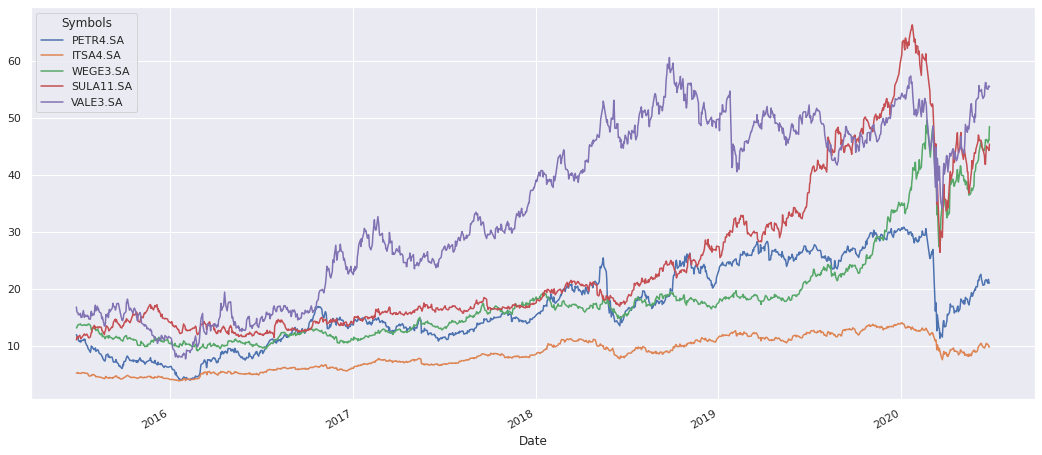

In [10]:
sns.set()
carteira.plot(figsize=(18,8))

*** para uma melhor analise, vamos normalizar os dados, ou seja, vamos dividir a carteira inteira pelo o seu primeiro termo, criando a relacao adequada ***

In [20]:
carteira_normalizada = ( carteira / carteira.iloc[0] ) * 1000
carteira_normalizada

Symbols,PETR4.SA,ITSA4.SA,WEGE3.SA,SULA11.SA,VALE3.SA
Date,,,,,
2015-06-29,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2015-06-30,987.548459,1003.378728,1002.639632,1036.147010,952.604095
2015-07-01,946.303609,1001.126335,1027.426013,1049.790082,943.229205
2015-07-02,961.089494,1018.017951,1032.170862,1023.190523,941.145941
2015-07-03,915.174996,1001.126335,1045.883650,1050.476408,920.833329
...,...,...,...,...,...
2020-06-19,1800.990856,2009.267090,3525.040530,4089.289787,3288.942659
2020-06-22,1757.371263,1959.083621,3478.507812,4050.266356,3278.808270
2020-06-23,1816.090014,1941.712590,3518.175043,4047.543557,3313.980950


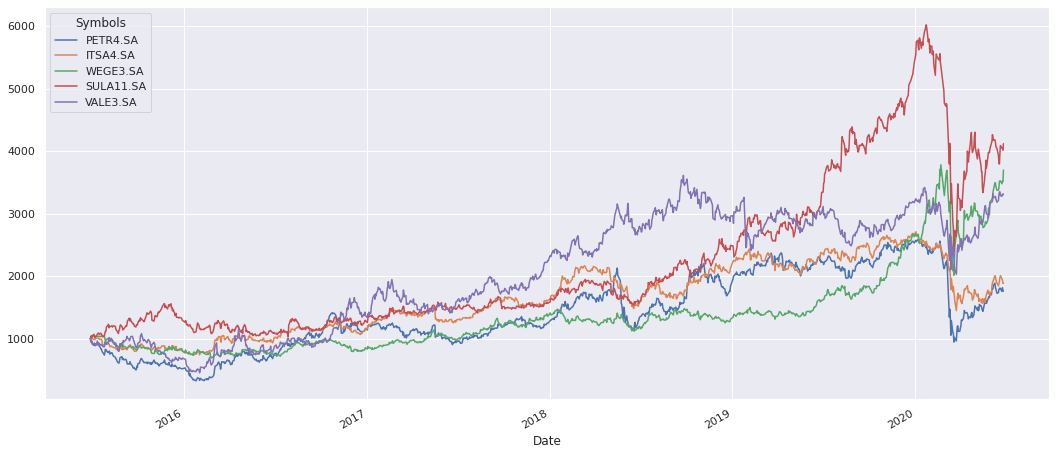

In [21]:
carteira_normalizada.plot(figsize=(18,8))

*** Criando uma coluna de SALDO que nos dira o somatorio da carteira ***

In [22]:
carteira_normalizada["Saldo"] = carteira_normalizada.sum(axis=1)

In [23]:
carteira_normalizada


Symbols,PETR4.SA,ITSA4.SA,WEGE3.SA,SULA11.SA,VALE3.SA,Saldo
Date,,,,,,
2015-06-29,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000
2015-06-30,987.548459,1003.378728,1002.639632,1036.147010,952.604095,4982.317924
2015-07-01,946.303609,1001.126335,1027.426013,1049.790082,943.229205,4967.875244
2015-07-02,961.089494,1018.017951,1032.170862,1023.190523,941.145941,4975.614770
2015-07-03,915.174996,1001.126335,1045.883650,1050.476408,920.833329,4933.494717
...,...,...,...,...,...,...
2020-06-19,1800.990856,2009.267090,3525.040530,4089.289787,3288.942659,14713.530922
2020-06-22,1757.371263,1959.083621,3478.507812,4050.266356,3278.808270,14524.037322
2020-06-23,1816.090014,1941.712590,3518.175043,4047.543557,3313.980950,14637.502154


In [24]:
ibov_normalizado = (ibov / ibov.iloc[0]) * 5000

In [25]:
ibov_normalizado

Date
2015-06-29    5000.000000
2015-06-30    5006.319086
2015-07-01    4975.855434
2015-07-02    5008.676953
2015-07-03    4953.314219
                 ...     
2020-06-19    9108.160109
2020-06-22    8991.587128
2020-06-23    9051.854227
2020-06-24    8901.139322
2020-06-25    8928.884793
Name: Adj Close, Length: 1234, dtype: float64

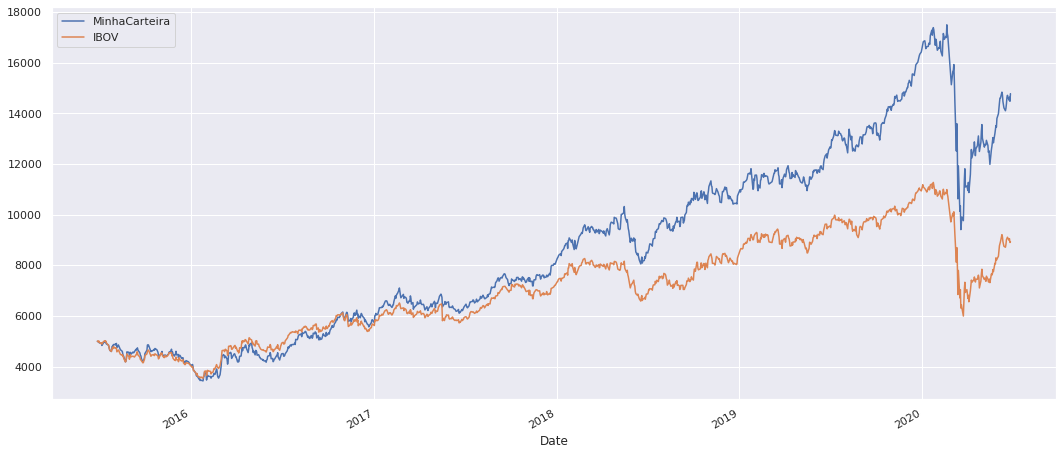

In [26]:
carteira_normalizada["Saldo"].plot(figsize=(18,8),label="MinhaCarteira")
ibov_normalizado.plot(label="IBOV")
plt.legend()
